# **Introduction**

In this tutorials, we are going to go through the materials we learned during the week and run some codes to help with the comprehension of the contents. These are the topics that will be covered in the first tutorial:

**Feature selection methods such as**:


1.   Filtering Method
2.   Wrapper Method
3.   Regularization Method



# **Feature Selection**

Lets use the dataset that we worked on in the first tutorial:


In [ ]:
# Importing some packages
import numpy as np # for numerical analysis
import pandas as pd # for dataframe manipulation
from tensorflow import keras
import matplotlib.pyplot as plt # for plotting data
from sklearn import linear_model # to use linear models in library
from sklearn.model_selection import train_test_split 
from sklearn import metrics # to evaluate the performance
from sklearn.linear_model import LinearRegression


from sklearn.datasets import load_boston
BostonDataset = load_boston()

# Extract the content of the dataset:
print(BostonDataset.keys())
# feature set size
print(BostonDataset.data.shape)
# target size
print(BostonDataset.target.shape)
# name of the features with their description
print(BostonDataset.feature_names)
# data description
print(BostonDataset.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to f

In [ ]:
Features = pd.DataFrame(BostonDataset.data, columns = BostonDataset.feature_names)
Target = pd.DataFrame(BostonDataset.target, columns=['Target'])
df = Features.join(Target)
# features and target at different samples
print(df)
# Features.isnull().sum(): To check if there is any missing value in the dataset

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Target
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...     ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67    22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08    20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64    23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48    22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88    11.9

[50

Now, we want to use different feature selection methods to choose a subset of features.

1.   **Filter Method**

As described in the lectures, we eliminate **redundunt** and **useless** features in this method. 
Let's first have a look at features and how they share information with each other and the output:

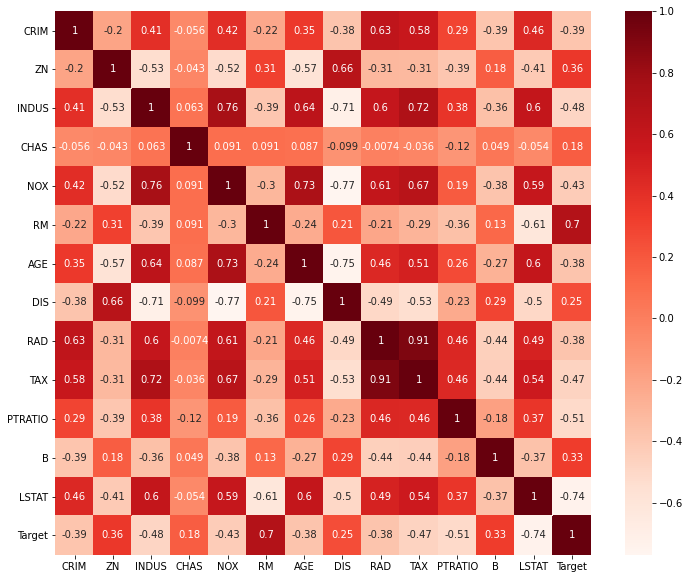

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Based on the calculated Correlation coefficient with the Target, we can decide which features have **useless** information and drop them. The threshold for correlation coefficitient is chosen to be 0.5 here.

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Target"])
#Selecting features with correlation coefficient higher than 0.5
rel_features = cor_target[cor_target>0.5]
rel_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
Target     1.000000
Name: Target, dtype: float64

These features have a higher correlation coefficient with the Target. However, they may be also correlated with each other and this does not effect our linear model in a good way (think how). Lets double check if they are highly correlated to each other or not:


In [ ]:
print(df[["LSTAT","PTRATIO","RM"]].corr())


            LSTAT   PTRATIO        RM
LSTAT    1.000000  0.374044 -0.613808
PTRATIO  0.374044  1.000000 -0.355501
RM      -0.613808 -0.355501  1.000000


From the results above, RM and LSTAT have a considerably high correlation coefficient compared to the other pairs. It means that we better drag one of them out of the selected featureset. This is how we get rid of **redundunt** featrures. We choose to drop RM as its correlation coefficient with the Target is less than LSTAT.

In [ ]:
sel_features = rel_features[1:3:]
sel_features

PTRATIO    0.507787
LSTAT      0.737663
Name: Target, dtype: float64

To have some paractice, you can now use these selected features to apply a multivariate regression on the model and compare it with a simple regression using the highest correlated feature with output.


2.   **Wrapper Method**

This method includes multiple ways to be used. We are going to try backward elimination here:


In [ ]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
Features_1 = sm.add_constant(Features)
#Fitting sm.OLS model
model = sm.OLS(Target,Features_1).fit()
model.pvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

Looking at the results, we realize that "AGE" has the highest pvalue more then 0.05 (The threshold) compared to the others. Therefore, we eliminate this feature and start over. Having a pvalue higher than 0.05 means that the feature is significantly different that Target. The higher pvalue is, the more significantly different it is from the Target and that is why we are eliminating that. 

This can be one iteration. Now lets try a loop:

In [ ]:
cols = list(Features.columns)
pmax = 1
while (len(cols)>0):
    p= []
    Features_1 = Features[cols]
    Features_1 = sm.add_constant(Features_1)
    model = sm.OLS(Target,Features_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


2.   **Regularization Method**

Regularization methods are the most commonly used embedded methods. 

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.


In [ ]:
from sklearn.linear_model import LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(Features, Target)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(Features,Target))
coef = pd.Series(reg.coef_, index = Features.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

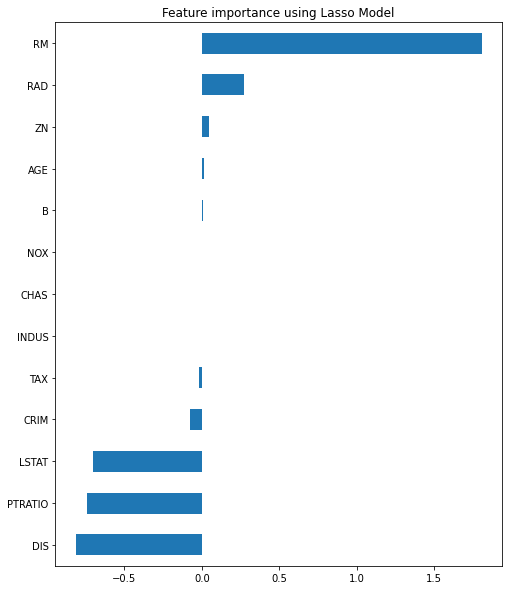

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

**Homework**

Other than the suggestions in the turotial that you went through, I suggest you to choose features using any of these methods and then use them to train a multivariate model. Then compare your findings with the condition you have not selected any feature. Can you explain what is the difference for?

**Reference**

[Feature Selection with sklearn and Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)